In [1]:
using Plots
using JLD2
using LaTeXStrings
using Polynomials

# Load the data

# Fig 5a

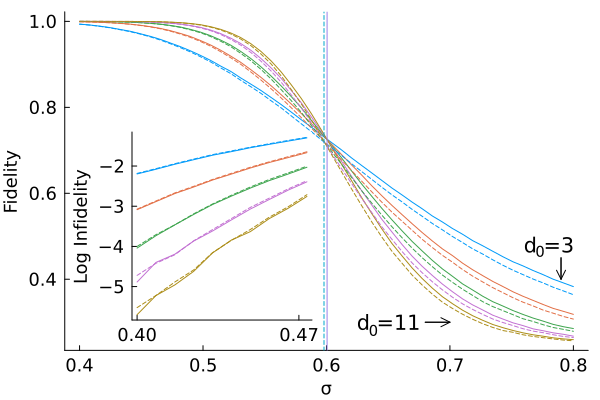

In [2]:
dmin = 3
dmax = 29
fn = "data/surface_codes/fidelity_time_surf_$(dmin)_$(dmax).jld2";
datalist = load(fn)
p0list_exact = datalist["p0list_exact"]
p0list_non_exact = datalist["p0list_non_exact"]
drange = collect(datalist["drange"])
σrange = collect(datalist["σrange"]);

plot()
# Plot with respect to sigma
xlabel!("σ")
ylabel!("Fidelity")


# indices for the inset 2
ind3 = 1
ind4 = 10


sorted_p0list_exact = values(sort(p0list_exact))
sorted_p0list_non_exact = values(sort(p0list_non_exact))

linecolors = get_color_palette(:auto, plot_color(:white))

drange_plot = 3 : 2 : 11

for (ind, d) in enumerate(drange_plot)
    plot!(σrange, 
        [p0list[ind] for p0list in sorted_p0list_exact], 
        label="exact, d=$d",
        linecolor=linecolors[ind]
    )
    
    if ind==1
        plot!(σrange[ind3:ind4], 
            [log10(1-p0list[ind]) for p0list in sorted_p0list_exact][ind3:ind4], 
            inset = bbox(0.48, 0.2, 0.3, 0.47, :bottom, :right),
            subplot = 2,
            grid = false,
            legend=false,
            linecolor=linecolors[ind]
        )
    else
        plot!(σrange[ind3:ind4], 
            [log10(1-p0list[ind]) for p0list in sorted_p0list_exact][ind3:ind4], 
            subplot = 2,
            grid = false,
            legend=false,
            linecolor=linecolors[ind]
        )        
    end     
end
for (ind, d) in enumerate(drange_plot)
    plot!(
        σrange, [p0list[ind] for p0list in sorted_p0list_non_exact], 
        linestyle = :dash, 
        label="non_exact, d=$d",
        linecolor=linecolors[ind]
    )
    
    plot!(σrange[ind3:ind4], 
        [log10(1-p0list[ind]) for p0list in sorted_p0list_non_exact][ind3:ind4], 
        subplot = 2,
        grid = false,
        linestyle = :dash,
        legend=false,
        linecolor=linecolors[ind]
    )    
end

plot!([0.5980], seriestype="vline", linestyle = :dash)
plot!([0.6005], seriestype="vline")
plot!(subplot=2, ylabel="Log Infidelity", xticks=round.([σrange[ind3], σrange[ind4]], digits=2))
plot!(grid=false, tickfontsize=12, labelfontsize=12, legend=false)

plot!([0.68,0.70],[0.3, 0.3],arrow=true,color=:black,linewidth=1)
annotate!(0.65, 0.3, "d =11")
annotate!(0.638, 0.281, text(0, 10))

plot!([0.79,0.79],[0.45, 0.4],arrow=true,color=:black,linewidth=1)
annotate!(0.78, 0.48, "d =3")
annotate!(0.773, 0.465, text(0, 10))


In [3]:
savefig("plots/fig_5a.pdf");

# Fig 5b

[0.5986861145110838, 0.6005174147217235, 0.6009645306472353, 0.602112656823419, 0.6017591025641025, 0.6023515503875969, 0.601890942985863]
[0.5988173852085524, 0.5976854192629517, 0.5981119710398202, 0.5989090816117814, 0.5990511585524604, 0.5994072704867528, 0.5993198121263877]


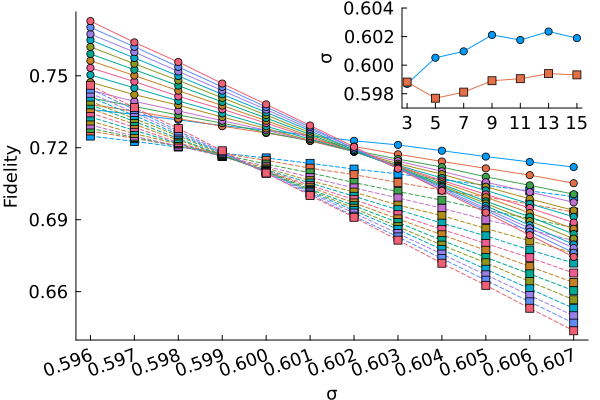

In [4]:
dmin_data = 3
dmax_data = 29 
drange = dmin_data : 2 : dmax_data
num_samples = 1e7
datalists = load("data/surface_codes/fidelity_time_surf_$(drange[1])_$(drange[end])_$(num_samples).jld2");
σrange = datalists["σrange"]

p0list_exact = datalists["p0list_exact"]
p0list_non_exact = datalists["p0list_non_exact"]

sorted_p0list_exact = collect(values(sort(p0list_exact)))
sorted_p0list_non_exact = collect(values(sort(p0list_non_exact)))

linecolors = get_color_palette(:auto, plot_color(:white))

plot()

for ind_d in 1 : length(drange)
    plot!(σrange, [item[ind_d] for item in sorted_p0list_exact], marker=:circle, color=linecolors[ind_d])
    plot!(σrange, [item[ind_d] for item in sorted_p0list_non_exact], linestyle = :dash, marker=:square, color=linecolors[ind_d])    
end
plot!(xlabel="σ", 
    ylabel="Fidelity", 
    legend=false,
    xticks=round.(σrange, digits=3),
    grid=false,
    tickfontsize=12,
    xrotation = 20,
    labelfontsize=12
)


crossings_exact = []
crossings_non_exact = []

crossing(x1, x2, y1,y2, y3,y4) = (x2/(x2-x1) * (y4-y1-y3+y2)+y1-y2) / ((y4-y1-y3+y2)/(x2-x1))


function get_crossing(sorted_p0list, d_ind)
    diff = [item[d_ind] for item in sorted_p0list] - [item[d_ind+1] for item in sorted_p0list]
    ind_1st_positive = findfirst(x->x>0, diff)
    
    σ1 = σrange[ind_1st_positive-1]
    σ2 = σrange[ind_1st_positive]    
    y1 = sorted_p0list[ind_1st_positive][d_ind+1]
    y2 = sorted_p0list[ind_1st_positive][d_ind]
    y3 = sorted_p0list[ind_1st_positive-1][d_ind]
    y4 = sorted_p0list[ind_1st_positive-1][d_ind+1]    
    
    return crossing(σ1, σ2, y1, y2, y3, y4)
end

dmin = drange[1]
dmax = 17 # drange[end]

crossings_exact = [get_crossing(sorted_p0list_exact, d_ind) for d_ind in 1 : length(dmin:2:dmax)-1]
crossings_non_exact = [get_crossing(sorted_p0list_non_exact, d_ind) for d_ind in 1 : length(dmin:2:dmax)-1] ;

println(crossings_exact)
println(crossings_non_exact)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_exact, 
    marker=:circle,
    subplot = 2,
    inset = bbox(0.03, 0.02, 0.3, 0.25, :top, :right),
    grid = false,
    legend=false,
    tickfontsize=12,    
    labelfontsize=12,
)

plot!((dmin:2:dmax)[1:end-1], 
    crossings_non_exact, 
    marker=:square,
    subplot = 2,
    grid = false,
    legend=false,
    ylim=[0.597, 0.604],
    tickfontsize=12,
    labelfontsize=12,
    xticks=dmin:2:(dmax-2),
    ylabel="σ",
)


In [5]:
savefig("plots/fig_5b.pdf");

# Fig 5c

σ=0.5959183673469388


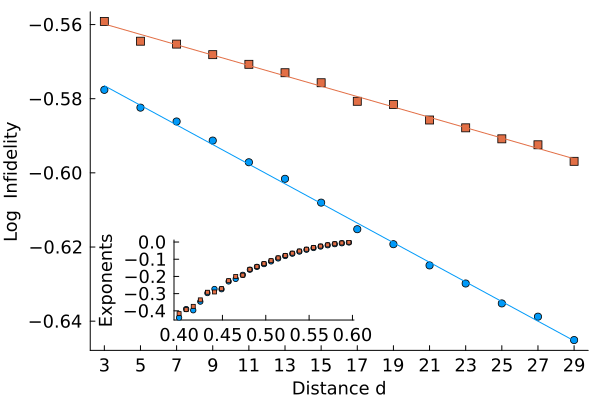

In [6]:
dmin = 3
dmax = 29
fn = "data/surface_codes/fidelity_time_surf_$(dmin)_$(dmax).jld2";
# fn = "fidelity_surf.jld2"
datalist = load(fn)
p0list_exact = datalist["p0list_exact"]
p0list_non_exact = datalist["p0list_non_exact"]
drange = collect(datalist["drange"])
σrange = collect(datalist["σrange"]);


σ = σrange[25]
println("σ=$σ")
fid_exact = p0list_exact[σ]
fid_non_exact = p0list_non_exact[σ]

infid_log_exact = log10.(1 .- fid_exact)
infid_log_non_exact = log10.(1 .- fid_non_exact)

# Fit
fit_log_exact = fit(dmin:2:dmax, infid_log_exact, 1)
fit_log_non_exact = fit(dmin:2:dmax, infid_log_non_exact, 1)

# println(fit_log_exact)
# println(fit_log_non_exact)

plot()
linecolors = get_color_palette(:auto, plot_color(:white))

scatter(dmin:2:dmax, infid_log_exact, marker=:circle, color=linecolors[1])
scatter!(dmin:2:dmax, infid_log_non_exact, marker=:square, color=linecolors[2])
plot!(dmin:2:dmax, fit_log_exact.(dmin:2:dmax), color=linecolors[1])
plot!(dmin:2:dmax, fit_log_non_exact.(dmin:2:dmax), color=linecolors[2])
plot!(ylabel="Log  Infidelity", xticks=dmin:2:dmax, 
    grid=:off, tickfontsize=12, labelfontsize=12, legend=:false, xlabel="Distance d")


# add inset

exponent_exact = []
exponent_non_exact = []
for σ in σrange[1:25]
#     println("σ=$σ")
    fid_exact = p0list_exact[σ]
    fid_non_exact = p0list_non_exact[σ]

    infid_log_exact = log10.(1 .- fid_exact)
    infid_log_non_exact = log10.(1 .- fid_non_exact)

    # Throw away the Inf
    ind_inf_exact = findfirst(x->x==-Inf, infid_log_exact)
    ind_inf_non_exact = findfirst(x->x==-Inf, infid_log_non_exact)
    
    if ind_inf_exact == nothing
        ind_inf_exact = length(infid_log_exact)+1
    end
    
    if ind_inf_non_exact == nothing
        ind_inf_non_exact = length(infid_log_non_exact)+1
    end    
    
    # Fit
    fit_log_exact = fit((dmin:2:dmax)[1:ind_inf_exact-1], infid_log_exact[1:ind_inf_exact-1], 1)
    fit_log_non_exact = fit((dmin:2:dmax)[1:ind_inf_non_exact-1], infid_log_non_exact[1:ind_inf_non_exact-1], 1)

    
    push!(exponent_exact, fit_log_exact(2)-fit_log_exact(1))
    push!(exponent_non_exact, fit_log_non_exact(2)-fit_log_non_exact(1))    

    
end

scatter!(σrange[1:25], 
    exponent_exact, marker=:circle, color=linecolors[1],
    subplot=2,
    inset = bbox(0.41, 0.2, 0.3, 0.2, :bottom, :right), 
    markersize=3,
)
scatter!(σrange[1:25], exponent_non_exact, marker=:square, color=linecolors[2], subplot=2,markersize=2,)
scatter!(ylabel="Exponents", 
    grid=:off, tickfontsize=12, labelfontsize=12, legend=:false, subplot=2)


In [7]:
savefig("plots/fig_5c.pdf");

# Fig 5d

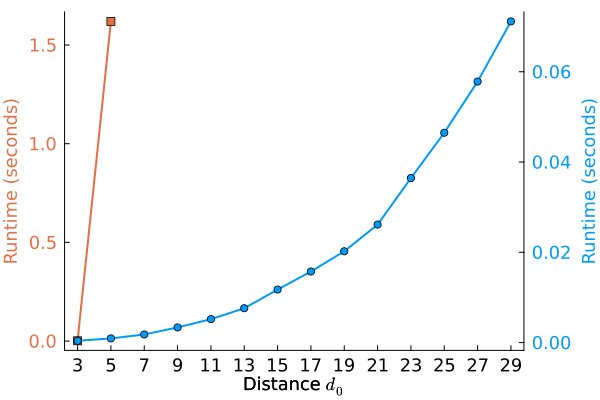

In [8]:
data = load("data/surface_codes/runtime_surf.jld2"); 
drange_closest_point = data["drange_closest_point"]
time_closest_point = data["time_closest_point"]
drange_decode_surface_code = data["drange_decode_surface_code"]
time_decode_surface_code = data["time_decode_surface_code"];

dmin = 3
dmax = 29 # 19
fn = "data/surface_codes/fidelity_time_surf_$(dmin)_$(dmax).jld2";
datalist = load(fn)
timelist_exact = datalist["timelist_exact"]
σ_compare = 0.8


linecolors = get_color_palette(:auto, plot_color(:white))

fontsize = 12
linewidth = 2
plot(drange_closest_point, time_closest_point, marker=:square,
    color=linecolors[2],
    linewidth=linewidth, 
    legend = false, 
    grid = :off,
    ytickfontcolor = linecolors[2],
    xtickfontsize=fontsize,
    ytickfontsize=fontsize,
    ylabel="Runtime (seconds)",
    yguidefontcolor=linecolors[2],
    yguidefontsize=fontsize,
)

p = twinx()
plot!(p, dmin:2:dmax, timelist_exact[σ_compare], marker=:circle,
        color=linecolors[1],
        linewidth=linewidth, 
        legend = false, 
        grid = :off,
        ytickfontcolor = linecolors[1],
        xtickfontsize=fontsize,
        ytickfontsize=fontsize,
        ylabel="Runtime (seconds)",
        yguidefontcolor=linecolors[1],
        yguidefontsize=fontsize,
)
plot!(xticks=dmin:2:dmax, xlabel="Distance " * L"d_0", xguidefontsize=fontsize, figsize=(1600, 800))


In [9]:
savefig("plots/fig_5d.pdf");